# Part 1:

1. Describe the data
2. Clean the data 
3. Check the data for missing values or duplicates and carry out proper correction 
methods
4. Visualize the data using proper visualization methods. 
5. Draw some of the images 
6. Carry out required correlation analysis

- divide the data into a training and test set using approximately 80% for training. 
- Decide if you need to standardize the data, by computing the mean and standard 
deviation for each feature dimension using the training set only, then subtracting the 
mean and dividing by the stdev for each feature and each sample. 
- Encode the label

In [158]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# Describe the Data

For this section I am going to explore the data (EDA) as follows:
1. Summary of the data (number of instances, columns)
2. Number of Missing Values
3. Number of Duplicates
4. basic stats (Mean, median, etc)
5. Class Representation (Is there imbalance?)


In [159]:
data = pd.read_csv("train.csv")

In [160]:
print(f"the data consists of {data.shape[0]} instances and {data.shape[1]} features extracted from the images")
print("--------------------------------------------------")
print(f"the data contains {data.isna().sum().sum()} missing values")
print("--------------------------------------------------")
print(f"the data contains {data.iloc[:, :2].duplicated().sum()} duplicated instances")

the data consists of 990 instances and 194 features extracted from the images
--------------------------------------------------
the data contains 0 missing values
--------------------------------------------------
the data contains 0 duplicated instances


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


The data has 192 float features, 1 int and 1 object which is the species feature

In [162]:
data.iloc[:, 1:].describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [163]:
data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [164]:
columns_species = list(data.columns.str.replace("[0-9]+", "", regex = True))
columns_counts = Counter(columns_species)
print(columns_counts)

Counter({'margin': 64, 'shape': 64, 'texture': 64, 'id': 1, 'species': 1})


The data contains 3 types of columns besides the id and the target
Those types are:
1. margin: 64 cols
2. shape: 64 cols
3. testure: 64 columns

This make the total of 194 columns

In [165]:
species = data["species"].value_counts()
display(species)
print("_________________________________________________________")
print(f"the data contains {species.shape[0]} different species")
print("_________________________________________________________")
print(f"{species[species == 10].shape[0]} species have 10 instances (images) each")
print("_________________________________________________________")

species
Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: count, Length: 99, dtype: int64

_________________________________________________________
the data contains 99 different species
_________________________________________________________
99 species have 10 instances (images) each
_________________________________________________________


In [166]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values[:, 2:])
pca = PCA(n_components=3)
data_red = pca.fit_transform(data_scaled)

# Visualize the Data

Here I will use PCA to project the data into the 3d space to be visualized. Another step after this is to understand the amount of explained variance for those 3 eigenvectors to check if they are sufficient to preserve the variance in the dataset.

In [167]:
le = LabelEncoder()
species = le.fit_transform(data["species"])

first_component = data_red[:, 0]
second_component = data_red[:, 1]
third_component = data_red[:, 2]

markers = dict( size=4, color=species)
scatter = go.Scatter3d(x= first_component, 
                       y= second_component, 
                       z= third_component, 
                       mode='markers', 
                       marker= markers)
fig = go.Figure(data=[scatter])

# center the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [168]:
pca.explained_variance_ratio_.sum()

0.4272710933749291

From the above graph we can see that the data is not linearly seperable and that means that a neural network might be a good idea for such a problem.
But is the above graph really descriptive? We had 0.42 explained variance ratio, but waht is the good ratio of explained variance?

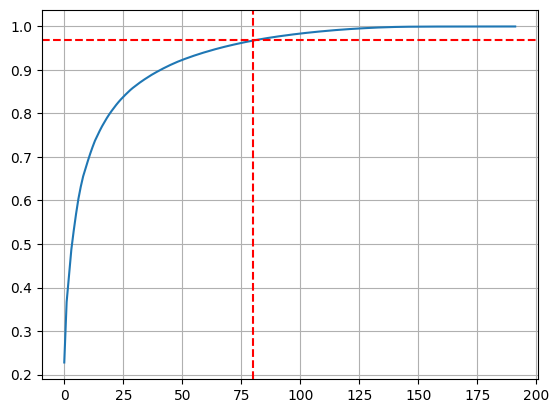

In [169]:
pca = PCA()
pca.fit(data_scaled)
cummulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cummulative)
plt.grid()
plt.axhline(y=0.97, color='r', linestyle='--', label = "")
plt.axvline(x=80, color='r', linestyle='--', label = "")

From the elbow method we can deduce that around principal components would be sufficient so owe can draw no conclusion from the projected data on 3 principal components.

# Show images

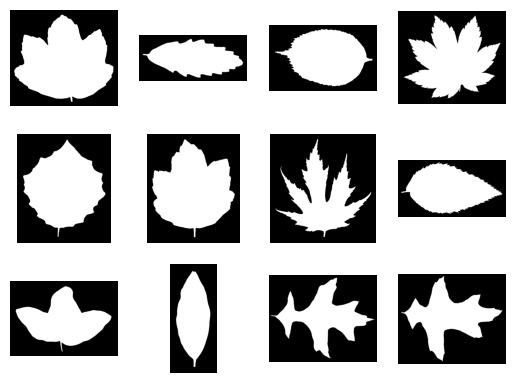

In [170]:
image_files = os.listdir("./images")
for i in range(12):

    image_path = os.path.join("./images", image_files[i])
    image = plt.imread(image_path)

    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray)

# Correlation Analysis

Since the data is consisting of histogram features that are extracted from the images, this means that they are numerical quantative features, except for the label which is categorical one, we can calculate the pearson correlation which calculates the linear relationship between features, we will use it with all feeatures except species and id.

In [171]:
# Making sure that the features are sorted
columns_1 = ["margin" + str(i) for i in range(1, 65)]
columns_2 = ["shape" + str(i) for i in range(1, 65)]
columns_3 = ["texture" + str(i) for i in range(1, 65)]

all_cols = columns_1 + columns_2 + columns_3

In [172]:
data[all_cols].iloc[:, :].corr().iloc[:, 127:]

,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,-0.110691,0.036154,0.030622,0.065515,-0.148751,0.091246,0.040331,-0.016047,-0.015561,0.017837,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.092298,-0.004042,0.039202,0.110634,-0.165041,0.186656,-0.066290,-0.032956,0.073977,-0.004697,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.065155,0.140093,0.020036,0.019587,0.029495,-0.044598,-0.089380,0.094371,-0.029431,-0.074143,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.006535,-0.039157,-0.049640,0.203871,-0.082317,0.030589,0.013515,-0.092425,0.090296,0.008613,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,0.158165,-0.155055,-0.068635,-0.152853,0.073237,0.043399,-0.010023,-0.124702,0.011964,0.064063,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.096818,-0.112472,-0.141218,-0.181973,-0.098065,-0.156409,-0.044226,-0.170709,-0.176429,-0.064995,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.173204,-0.029803,-0.121736,0.275601,-0.106833,0.047808,-0.111720,-0.085592,0.014635,-0.124593,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.012569,-0.190008,-0.243517,-0.272880,-0.011305,-0.241493,-0.049642,-0.225021,-0.278322,-0.048505,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024816,-0.090583,0.086803,0.107869,0.039765,-0.180592,0.190450,0.007076,-0.043330,0.306404,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


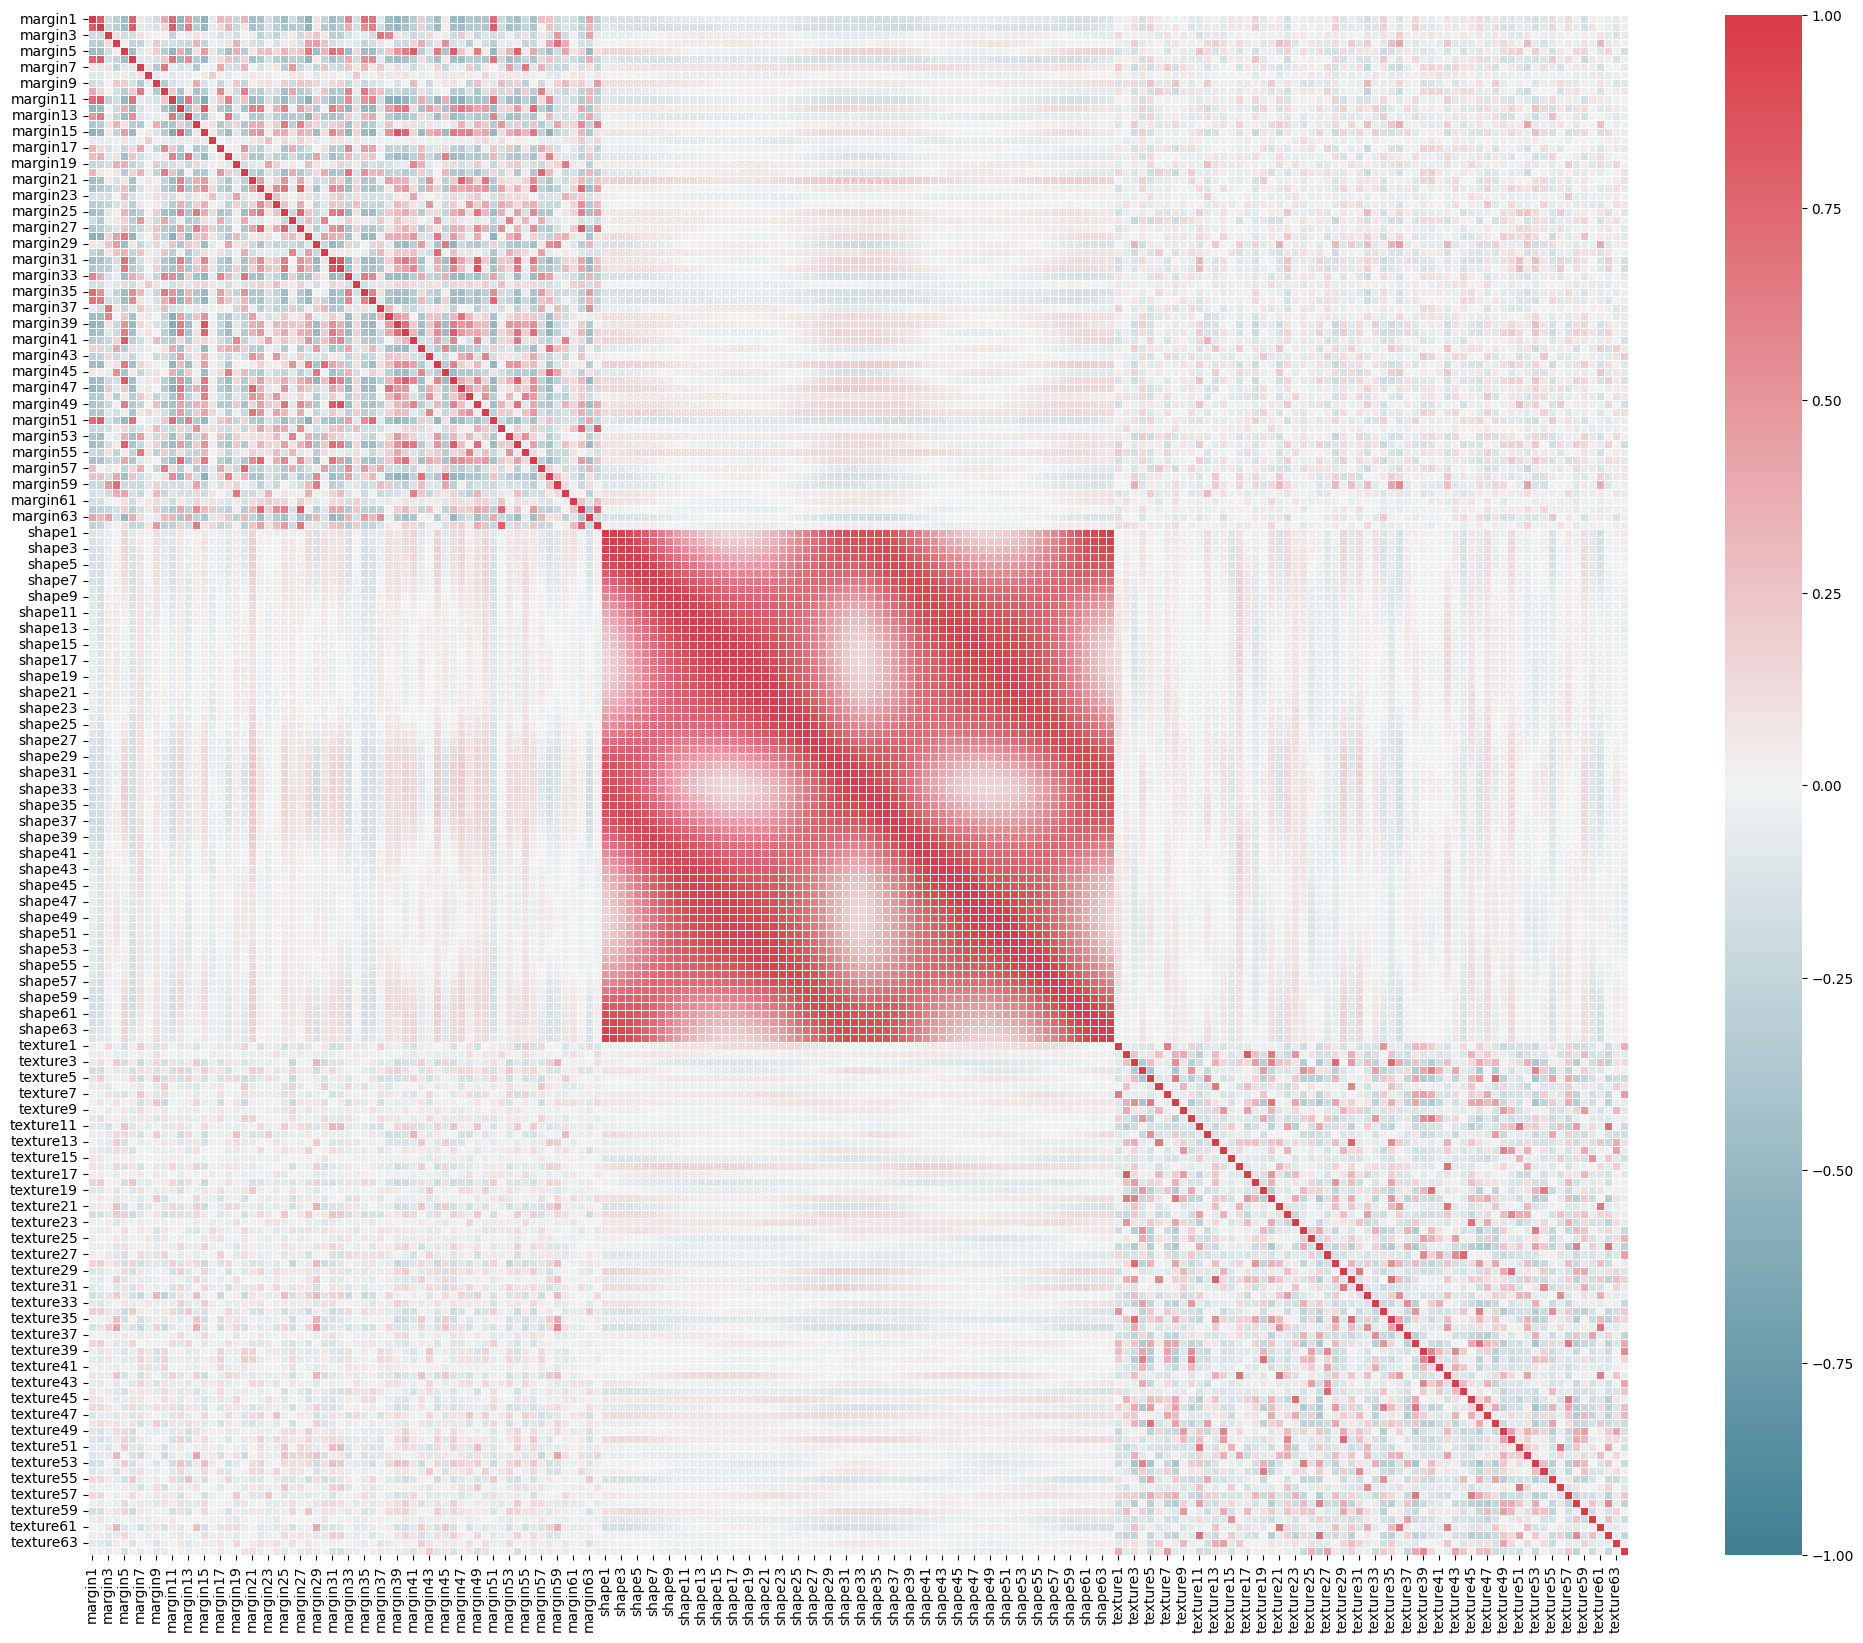

In [173]:
# this part of the code is cited from my own tutorial on Kaggle here https://www.kaggle.com/code/moghazy/ensemble-learning-with-feature-engineering
# I use it because I find the paletter very useful for visualizing the correlation matrix

import seaborn as sns

figsize = (25, 20)
correlation_vals = data[all_cols].iloc[:, :].corr()

f, ax = plt.subplots(figsize=figsize)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_vals, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5)
plt.show()

It seems that the shape features are very highly positevly correlated with each other (most of them), many other features are also correlated highly either positevly or negatively (linear component), this aligns with the idea that we can project the data on much smaller space from the above PCA analysis.

We can check whether those features are actually significant to  the target variable which is the species, we couldn't measure this using correlation because the target is categorical nominal feature, but we can measure the segnificance using one-way ANOVA.

In [174]:
# This part of the code is cited from my Machine Learnig Course Project

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def one_way_anova(x_train: pd.DataFrame, y_train: pd.Series, k: int) -> pd.DataFrame:
    """
    Selects the top k quantitative features using the f_classif score.
    
    Args:
        x_train: DataFrame containing the training data.
        y_train: Series containing the target labels.
        k: Number of features to select.
        
    Returns:
        pd.DataFrame: Transformed training data with the selected "K" features.
        selector: Feature selector object to get the importances.
    """

    selector = SelectKBest(f_classif, k=k)
    x_train_dim = selector.fit_transform(x_train, y_train)

    return x_train_dim, selector

In [175]:
_, selector = one_way_anova(data[all_cols], data["species"], len(data[all_cols].columns))

cols = {"Scores" : selector.scores_, "P_values" : selector.pvalues_}

scores = pd.DataFrame(cols, index = data[all_cols].columns)
scores[scores.P_values < 0.05].sort_values(by = "Scores", ascending = False)

,Scores,P_values
shape16,116.292408,0.000000e+00
shape17,114.529356,0.000000e+00
shape18,109.483234,0.000000e+00
shape15,109.354733,0.000000e+00
shape49,105.280069,0.000000e+00
...,...,...
margin16,6.617562,2.482542e-57
texture41,6.421945,2.865697e-55
margin61,4.854639,2.994655e-38
margin34,4.699669,1.579328e-36


Looks like all the features are segnificant with respect to 0.05 p_value, but this doesn't mean that we need to use all of them, as we saw earlier many of them are linearly correalted and fewer principal component can give us 0.97 ratio of explained variance.

It i very important to note that the target variable is a categorical nominal feature that denotes the type of plant species, this means that we can't measure the pearson correlation between any of the quantative features and the target since the target is qualitative feature (evn if we labl encode it), this is why I used one way anova to measure the significance of those features with respect to the target, but if a feature is significant, then so as its co-linear features as well, so even if all features are significant, we can still remove colinear features. I will use PCA and explained variance ratio to reduce dimensianality instead of uding just correlations.

# Encode the Label

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(data[["species"]].values).toarray()

# Split the Data

In [177]:
x_train, x_test, y_train, y_test = train_test_split(data[all_cols], y, test_size=0.2, random_state=42)

# Standardization

In [178]:
x_train[all_cols].describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,...,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.017460,0.028841,0.031065,0.023265,0.014256,0.038229,0.019351,0.001142,0.007122,0.018466,...,0.034414,0.005200,0.016491,0.010726,0.016110,0.013684,0.002612,0.019820,0.009286,0.019894
std,0.019840,0.039481,0.025302,0.028378,0.018455,0.051631,0.017731,0.002869,0.008986,0.015886,...,0.059560,0.019709,0.023981,0.023750,0.015522,0.060194,0.011689,0.039412,0.013950,0.023202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.000000,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.023438,0.013672,0.007812,0.014649,0.015625,0.000000,0.005859,0.015625,...,0.003906,0.000000,0.006836,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.039551,0.042969,0.029297,0.019531,0.054688,0.029297,0.000000,0.007812,0.027344,...,0.040283,0.000000,0.021484,0.008789,0.021484,0.000000,0.000000,0.022461,0.013672,0.029541
max,0.085938,0.205080,0.138670,0.169920,0.111330,0.275390,0.091797,0.031250,0.076172,0.097656,...,0.375980,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.082031,0.141600


In [179]:
max_val = x_train[all_cols].describe().loc["max"].max()
min_val = x_train[all_cols].describe().loc["min"].min()
mean = x_train[all_cols].describe().loc["mean"].max()
standard_deviation = x_train[all_cols].describe().loc["std"].max()
standard_deviation_minimum = x_train[all_cols].describe().loc["std"].min()

print(f"the min value in cols is {min_val} while the maximum val in cols is {max_val}")
print(f"the max mean value in cols is {mean} while the maximum standard deviation val in cols is {standard_deviation} \nand the minimum value for the standard deviation is {standard_deviation_minimum}")

the min value in cols is 0.0 while the maximum val in cols is 0.85352
the max mean value in cols is 0.04092440909090909 while the maximum standard deviation val in cols is 0.07034868893784878 
and the minimum value for the standard deviation is 0.00023920678954064754


It is better for gradient descent to work on standardized datasets to make it converge faster

In [180]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[all_cols])
x_test_scaled = scaler.transform(x_test[all_cols])

# giving the needed explained variance instead of the number of components
pca = PCA(n_components=0.97)
x_train_red = pca.fit_transform(x_train_scaled)
x_test_red = pca.transform(x_test_scaled)
x_train_red.shape, x_test_red.shape

((792, 85), (198, 85))

In [181]:
y_train.shape

(792, 99)

# Part 2

• Batch size: Number of examples per training iteration. 

• Hidden size: Try using different number of hidden nodes in your model and compare the 
performances. 

• Dropout is an effective strategy to defend against overfitting. Adding a dropout layer 
after the hidden layer, and try using different dropout rate to compare the performances. 

• Optimizer: Try using different optimizers such as SGD, Adam, RMSProp. 

• Regularization (weight decay): L2 regularization can be specified by setting the 
weight_decay parameter in optimizer. Try using different regularization factor and check 
the performance. 

• Learning rate, Learning rate scheduler: Learning rate is key hyperparameter in model 
training, and you can gradually decreasing the learning rate to further improve your 
model. Try using different learning rate and different learning rate scheduler to compare 
the performance.

In [182]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [183]:
# Schedule code inspired by the documentation of keras https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/

import keras
from keras.optimizers.schedules import ExponentialDecay, PiecewiseConstantDecay, PolynomialDecay
from keras.callbacks import TensorBoard

def eval_model(model, x_test, y_test, x_train, y_train):
    """evaluate the model on the test dataset
    Args:
        model: the model to be evaluated
        x_test: the test dataset
        y_test: the test labels
    Returns:
        Accuracy and loss on test set"""
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=10)
    loss_train, accuracy_train = model.evaluate(x_train, y_train, batch_size=10)
    return loss, accuracy, loss_train, accuracy_train

def train_model(n_nodes: int,
                batch_size: int,
                drop_out_prc: float,
                optimizer: str,
                weight_decay: float,
                learning_rate: float,
                scheduler: str,
                model_index: int,
                trial_name: str) -> keras.callbacks.History:
    """This function trains a neural network model with the given set of parameters
    Args:
        n_nodes: number of nodes in the hidden layer
        batch_size: number of rows/instances per mini-batch
        drop_out_prc: prc of nodes to be dropped out randomly during training
        optimizer: the algotrithm usesd to optimize the algorithm
        weight_decay: the amound of decay applied to weights
        learning_rate: the initial learning rate for the learning
        scheduler: the learning rate scheduler to be used to adjust the learning rate during training
        model_index: the index of the model to be used for tensorboard logging
    Returns:
        history: the training performance and loss on training and validation sets for each epoch of training process"""
    
    callback = TensorBoard(log_dir=f"logs/{trial_name}/" + f"model_{model_index}")

    # Model base layers, input, hidden, dropout and output
    # We will make the dropout prc 0 if we don't want to use this layer
    model = keras.Sequential()
    model.add(keras.Input(shape=(85,)))
    model.add(keras.layers.Dense(n_nodes, activation="tanh"))
    model.add(keras.layers.Dropout(drop_out_prc))
    model.add(keras.layers.Dense(99, activation="softmax"))


    # using three different types of learning rate schedulers
    # exponential, piecewise and polynomial
    # used with adam optimizer
    if scheduler == "exp":
        lr_schedule = ExponentialDecay(initial_learning_rate=0.1,
                                    decay_steps=10000,
                                    decay_rate=0.01)
        optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
    elif scheduler == "piecewise":
        lr_schedule = PiecewiseConstantDecay(boundaries=[500, 10000, 10500], values=[0.01,0.005,0.001, 0.0001])
        optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
    elif scheduler == "polynomial":
        lr_schedule = PolynomialDecay(0.1, 10000, power=2)
        optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

    # When we want to use a constant learning rate with different optimizers
    if (optimizer == "adam") & (scheduler == "constant"):
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate, weight_decay=weight_decay)
    elif (optimizer == "nadam") &( scheduler == "constant"):
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate, weight_decay=weight_decay)
    elif( optimizer == "rmsprop") & (scheduler == "constant"):
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate, weight_decay=weight_decay)

    # compilint and fiitting the model on the training dataset
    # using callbacks to log for tensorboard
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    history = model.fit(x_train_red, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, verbose = 0, callbacks=[callback])
    loss, accuracy, loss_train, accuracy_train = eval_model(model, x_test_red, y_test, x_train_red, y_train)
    print(f"accuracy on test set is {accuracy}, loss on test set is {loss}")
    print(f"accuracy on training set is {accuracy_train}, loss on training set is {loss_train}")
    return history

Function to plot the curves

In [184]:
def plot_acc_loss(trials, histories, rows = 2, cols = 3, trial_name = ""):
    """plot the accuracy curve and the loss curve for the model after being trained on various hyperparameters
    Args:
        trials: the list of hyperparameters for one trial, where a trial has 3 or more values for this hyperparameter
        histories: the list of training history objects for each model, each model is trained on a value for the hyperparameter
        rows: number of rows of the subplots
        cols: number of columns of the subplots
    """

    f = plt.figure(figsize=(15,10))

    # plot for each model in a grid of n rows and n columns
    for i, vals in enumerate(zip(histories, trials)):

        history, val = vals
        plt.subplot(rows, cols, i + 1)
        
        # plot accuracy and validation accuracy
        plt.plot(history.history.get("accuracy"), label = f"train_{trial_name}_{val}")
        plt.plot(history.history.get("val_accuracy"), label = f"validation_{trial_name}_{val}")
        
        plt.title('accuracy curves plot'), plt.ylabel('accuracy'), plt.xlabel('epoch')
        plt.legend()

        plt.subplot(rows, cols, i + cols + 1)

        # plot loss and validation loss
        plt.plot(history.history.get("loss"), label = f"train_{trial_name}_{val}")
        plt.plot(history.history.get("val_loss"), label = f"validation_{trial_name}_{val}")

        plt.title('loss curves plot'), plt.ylabel('loss'), plt.xlabel('epoch')
        plt.legend()

    plt.show()

# Batch Size

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9793 - loss: 0.1327
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9991 - loss: 0.0173
accuracy on test set is 0.9797979593276978, loss on test set is 0.13508400321006775
accuracy on training set is 0.9924242496490479, loss on training set is 0.04786152392625809
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9397 - loss: 0.4457
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9987 - loss: 0.1698
accuracy on test set is 0.9545454382896423, loss on test set is 0.43496355414390564
accuracy on training set is 0.9898989796638489, loss on training set is 0.22640565037727356
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9016 - loss: 0.7796
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9962 - loss: 0.4136
accuracy on test set is 0.939393937587738, loss on test set is 0.7395745515823364
accuracy on training set is 0.9835858345031738, loss on training set is 0.4921695291996002


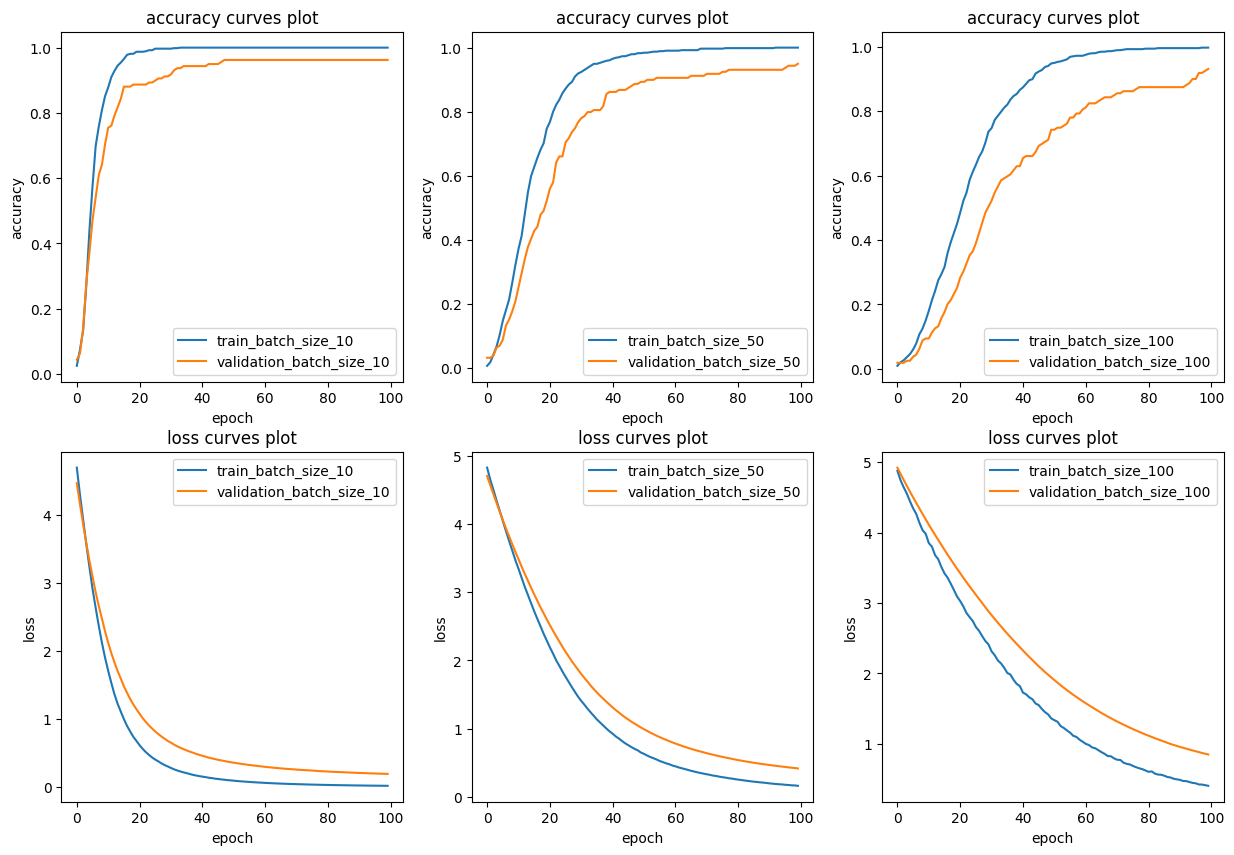

In [185]:
histories = []

for index, batch_size in enumerate([10, 50, 100]):
    history = train_model(n_nodes = 300,
                        batch_size = batch_size,
                        drop_out_prc = 0,
                        optimizer = "adam",
                        weight_decay = 0,
                        learning_rate = 0.0001,
                        scheduler = "constant",
                        model_index = index,
                        trial_name = "batch_size")
    histories.append(history);

plot_acc_loss([10, 50, 100], histories, trial_name="batch_size")

# Hidden Size

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8958 - loss: 1.0954
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9852 - loss: 0.6290
accuracy on test set is 0.8838383555412292, loss on test set is 1.0987180471420288
accuracy on training set is 0.9558081030845642, loss on training set is 0.7462617754936218
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9644 - loss: 0.2011
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9988 - loss: 0.0310
accuracy on test set is 0.9696969985961914, loss on test set is 0.1729506403207779
accuracy on training set is 0.9911616444587708, loss on training set is 0.06472305953502655
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.9473 - loss: 0.1466
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9988 - loss: 0.0176
accuracy on test set is 0.9646464586257935, loss on test set is 0.1387404501438141
accuracy on training set is 0.9911616444587708, loss on training set is 0.04739396646618843


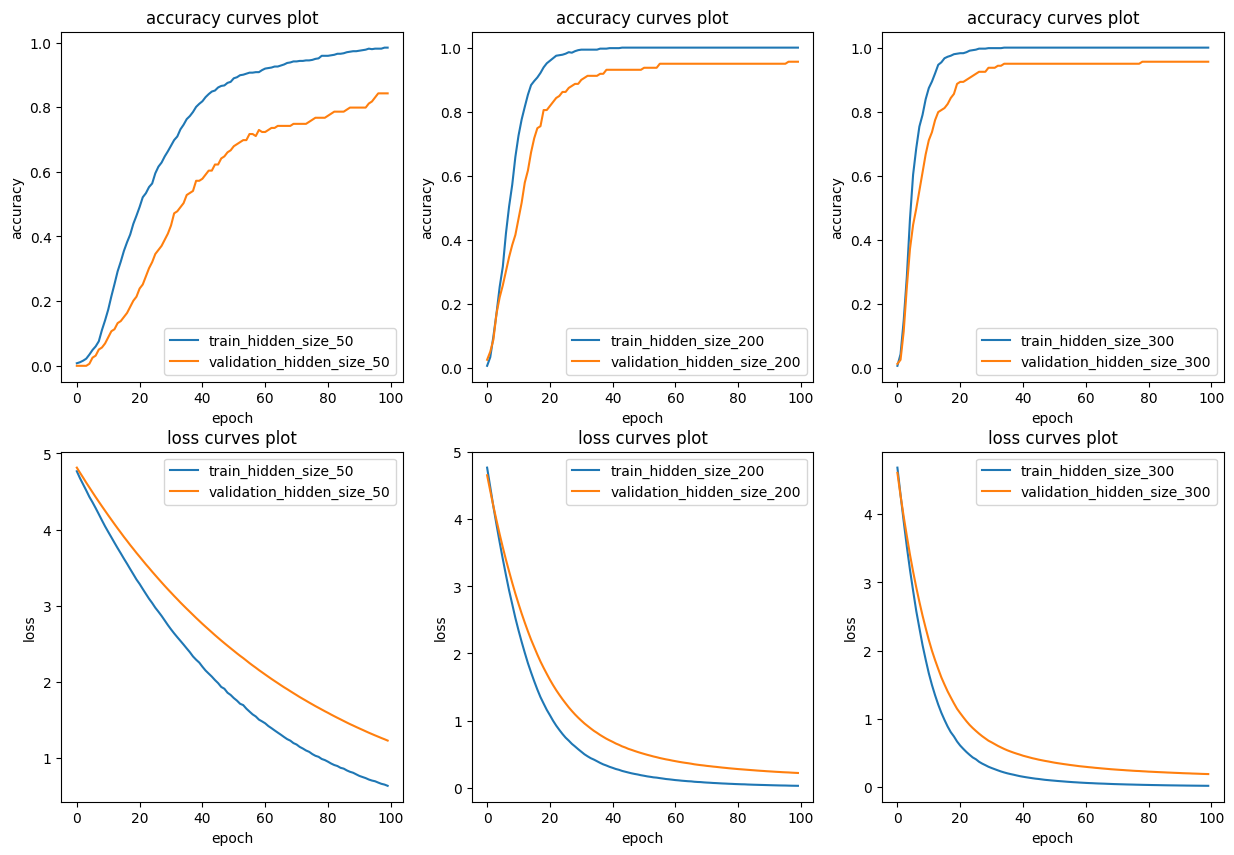

In [186]:
histories = []

params = [50, 200, 300]
for index, hidden_size in enumerate(params):
    history = train_model(n_nodes = hidden_size,
                        batch_size = 10,
                        drop_out_prc = 0,
                        optimizer = "adam",
                        weight_decay = 0,
                        learning_rate = 0.0001,
                        scheduler = "constant",
                        model_index = index,
                        trial_name = "hidden_size")
    histories.append(history);

plot_acc_loss(params, histories, trial_name = "hidden_size")

# Dropouts

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9691 - loss: 0.1504
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9993 - loss: 0.0174
accuracy on test set is 0.9747474789619446, loss on test set is 0.144026517868042
accuracy on training set is 0.9949495196342468, loss on training set is 0.04555826634168625
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.9604 - loss: 0.1467
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9990 - loss: 0.0216
accuracy on test set is 0.9696969985961914, loss on test set is 0.14567053318023682
accuracy on training set is 0.9924242496490479, loss on training set is 0.054023705422878265
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9765 - loss: 0.1880
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9990 - loss: 0.0285
accuracy on test set is 0.9696969985961914, loss on test set is 0.17629021406173706
accuracy on training set is 0.9924242496490479, loss on training set is 0.060428958386182785


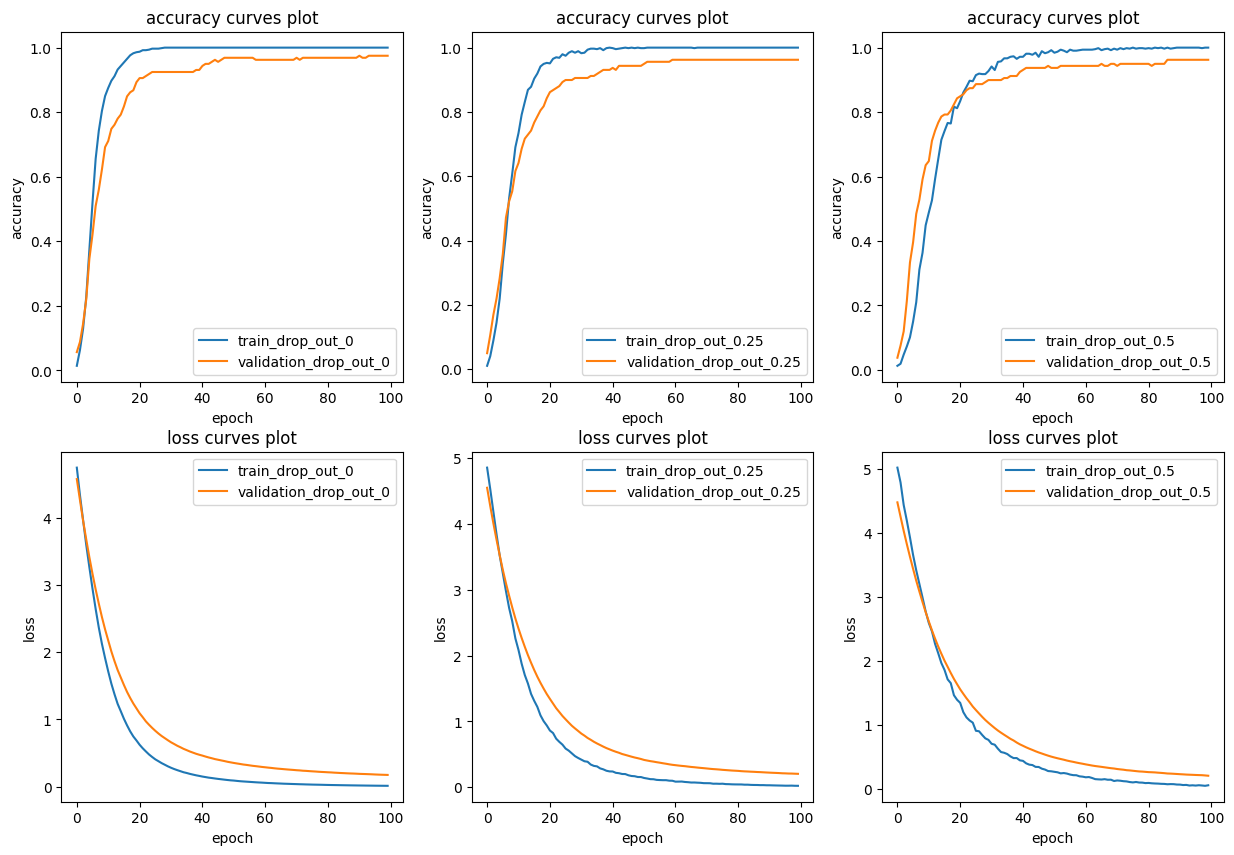

In [187]:
histories = []

params = [0, 0.25, 0.5]
for index, drop_out in enumerate(params):
    history = train_model(n_nodes = 300,
                        batch_size = 10,
                        drop_out_prc = drop_out,
                        optimizer = "adam",
                        weight_decay = 0,
                        learning_rate = 0.0001,
                        scheduler = "constant",
                        model_index = index,
                        trial_name = "drop_out")
    histories.append(history);

plot_acc_loss(params, histories, trial_name = "drop_out")

# Optimizers

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9793 - loss: 0.1758
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.9991 - loss: 0.0210
accuracy on test set is 0.9797979593276978, loss on test set is 0.1564464271068573
accuracy on training set is 0.993686854839325, loss on training set is 0.05106328800320625
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.9793 - loss: 0.1684
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9992 - loss: 0.0205
accuracy on test set is 0.9797979593276978, loss on test set is 0.13893145322799683
accuracy on training set is 0.993686854839325, loss on training set is 0.0488557405769825
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9778 - loss: 0.1501
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9990 - loss: 0.0111
accuracy on test set is 0.9747474789619446, loss on test set is 0.12155690044164658
accuracy on training set is 0.9924242496490479, loss on training set is 0.04082539677619934


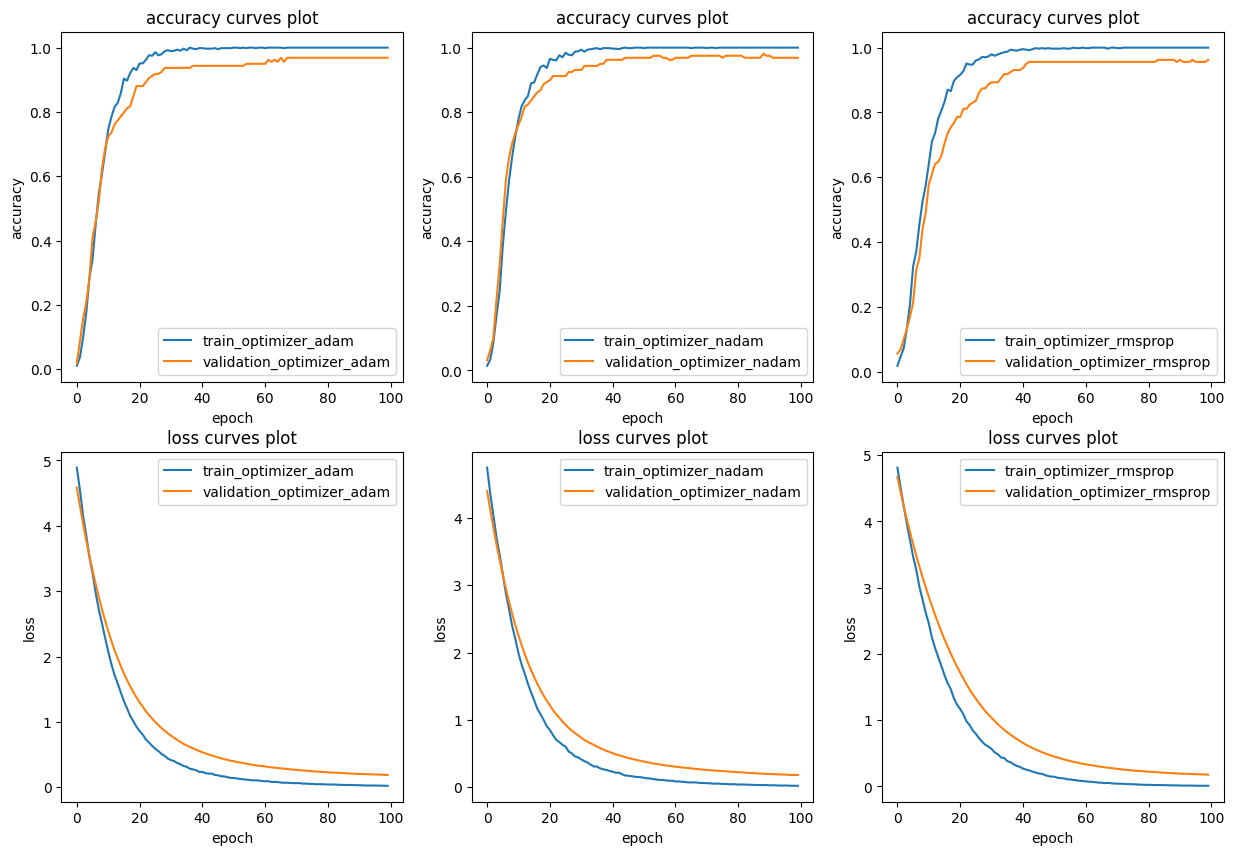

In [188]:
histories = []

params = ["adam", "nadam", "rmsprop"]
for index, optimizer in enumerate(params):
    history = train_model(n_nodes = 300,
                        batch_size = 10,
                        drop_out_prc = 0.25,
                        optimizer = optimizer,
                        weight_decay = 0,
                        learning_rate = 0.0001,
                        scheduler = "constant",
                        model_index = index,
                        trial_name = "optimizer")
    histories.append(history);

plot_acc_loss(params, histories, trial_name = "optimizer")

Regularization (weight decay)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9691 - loss: 0.1367
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9991 - loss: 0.0175
accuracy on test set is 0.9747474789619446, loss on test set is 0.13604877889156342
accuracy on training set is 0.9924242496490479, loss on training set is 0.04547708481550217
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9765 - loss: 0.1391
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9991 - loss: 0.0204
accuracy on test set is 0.9696969985961914, loss on test set is 0.140618234872818
accuracy on training set is 0.9924242496490479, loss on training set is 0.05008900165557861
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9778 - loss: 0.2380
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9993 - loss: 0.0642
accuracy on test set is 0.9747474789619446, loss on test set is 0.22541549801826477
accuracy on training set is 0.9949495196342468, loss on training set is 0.10205266624689102


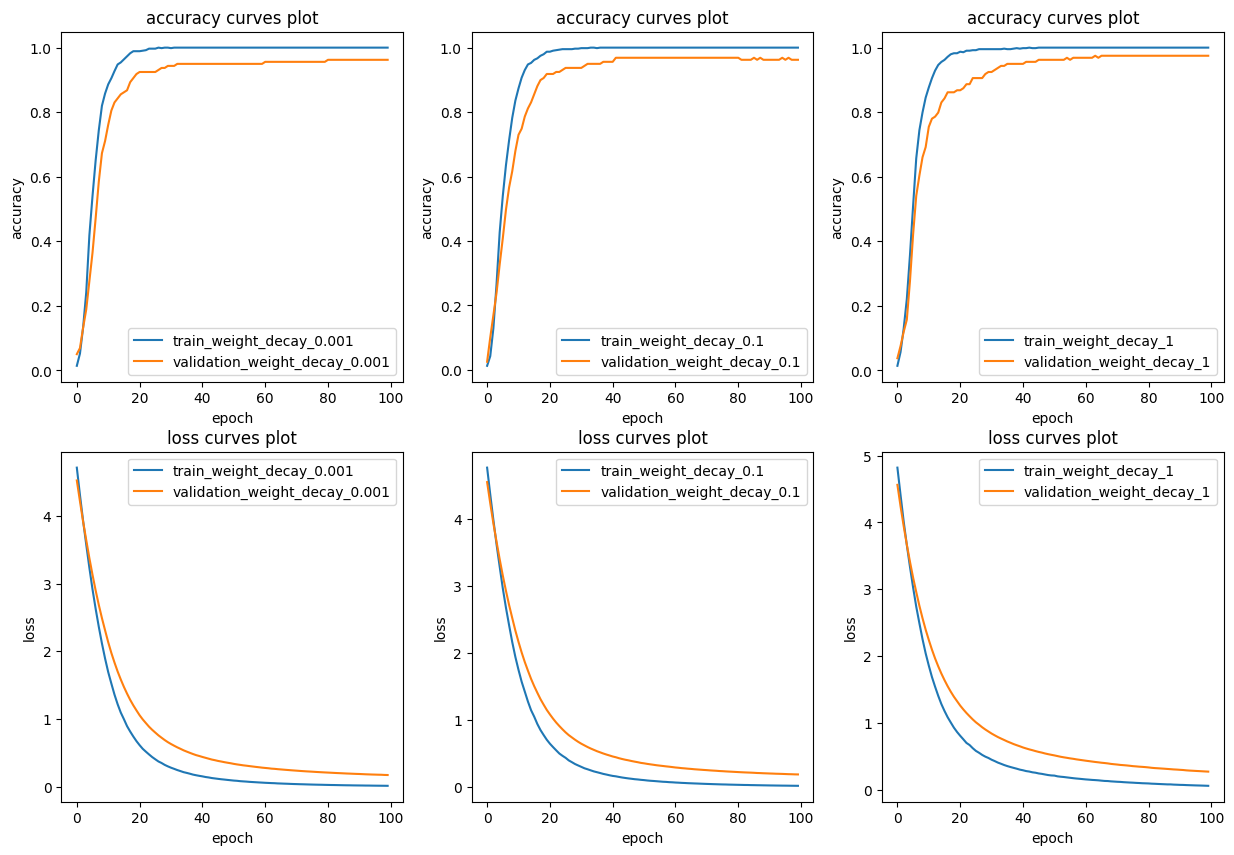

In [192]:
histories = []

params = [0.001, 0.1, 1]
for index, weights in enumerate(params):
    history = train_model(n_nodes = 300,
                        batch_size = 10,
                        drop_out_prc = 0,
                        optimizer = "nadam",
                        weight_decay = weights,
                        learning_rate = 0.0001,
                        scheduler = "constant",
                        model_index = index,
                        trial_name = "weight_decay")
    histories.append(history);

plot_acc_loss(params, histories, trial_name = "weight_decay")

# Learning Rate Schedule

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9265 - loss: 1.5159
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9983 - loss: 0.0677 
accuracy on test set is 0.9444444179534912, loss on test set is 1.0642037391662598
accuracy on training set is 0.9873737096786499, loss on training set is 0.46875232458114624
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.9806 - loss: 0.0432
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9993 - loss: 0.0055    
accuracy on test set is 0.9848484992980957, loss on test set is 0.0891047865152359
accuracy on training set is 0.993686854839325, loss on training set is 0.03907604515552521
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9476 - loss: 2.1989
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9983 - loss: 0.1067   
accuracy on test set is 0.9595959782600403, loss on test set is 1.6932014226913452
accuracy on training set is 0.9861111044883728, loss on training set is 0.7789102792739868
20/20 ━━━━━━━━━━━━━

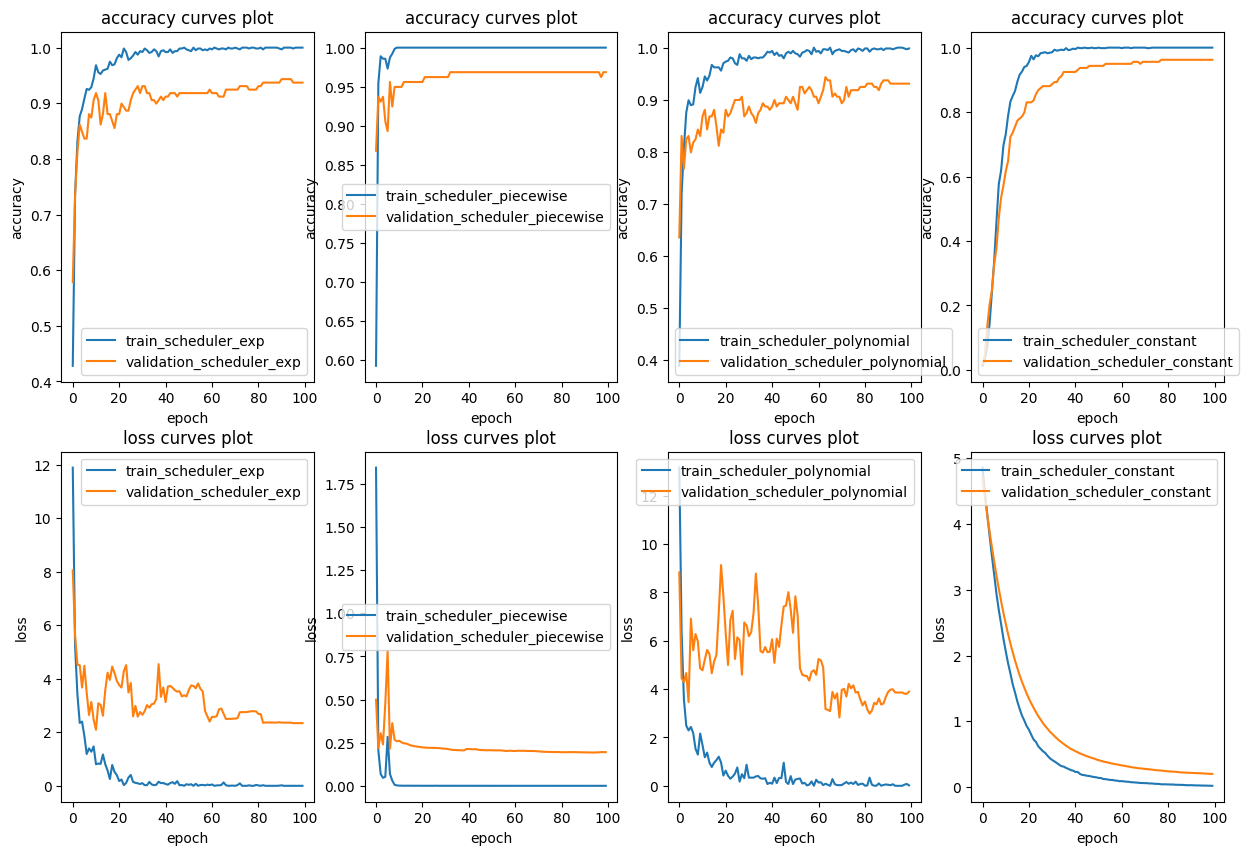

In [190]:
histories = []

params = ["exp", "piecewise", "polynomial", "constant"]
for model_index, scheduler in enumerate(params):
    history = train_model(n_nodes = 300,
                        batch_size = 10,
                        drop_out_prc = 0.25,
                        optimizer = "nadam",
                        weight_decay = 0,
                        learning_rate = 0.0001,
                        scheduler = scheduler,
                        model_index = model_index,
                        trial_name = "scheduler")
    histories.append(history);

plot_acc_loss(params, histories, 2, 4, trial_name = "scheduler")